<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Calculating and Plotting Reaction Properties</h1><br />
</tr>
</table>
</left>

### Getting ready

Functions from the pyCHNOSZ and matplotlib packages are used in this demo. Import them with:

In [1]:
from pyCHNOSZ import *
import matplotlib.pyplot as plt

Use info("name") to search for the index number of a chemical species in the thermodynamic database, [OBIGT](https://chnosz.net/vignettes/OBIGT.html).

In [2]:
info("Pyri")  # a partial name might result in approximate matches to try

info.approx: 'Pyri' is ambiguous; has approximate matches to 16 species:

 [1] "a-aminobutyric acid" "myristate"           "β-hydroxymyristate" 
 [4] "deoxyribose"         "chalcopyrite"        "chalcopyrite"       
 [7] "chalcopyrite"        "chlorargyrite"       "pyrite"             
[10] "arsenopyrite"        "deoxyribose"         "pyridine"           
[13] "pyridine"            "3-methylpyridine"    "pyridine"           
[16] "3-methylpyridine"   



[NA]

In [3]:
info("pyrite") # case sensitive!

[1953]

Use info(index) to get the entry itself.

In [4]:
info(1929)

info.numeric: Cp of chalcopyrite(cr3) is NA; set by EOS parameters to 41.22 cal K-1 mol-1



,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a,b,c,d,e,f,lambda,T
1929,chalcopyrite,Ccp,CuFeS2,cr3,HDNB78,OBIGT.1,1978-05-05,cal,-46119.409,-49143.645,...,41.22,42.83,41.22,0.0,0.0,0.0,0.0,0.0,0.0,1200.0


When Jupyter notebooks abbreviate tables by omitting some columns (indicated by `...`) you can look up all column names in a table with:

In [5]:
info(1929).columns

info.numeric: Cp of chalcopyrite(cr3) is NA; set by EOS parameters to 41.22 cal K-1 mol-1



Index(['name', 'abbrv', 'formula', 'state', 'ref1', 'ref2', 'date', 'E_units',
       'G', 'H', 'S', 'Cp', 'V', 'a', 'b', 'c', 'd', 'e', 'f', 'lambda', 'T'],
      dtype='object')

What do these columns mean? What units are entries in?

| header | meaning                                                                    |
| ------ | -------------------------------------------------------------------------- |
|name    |Species name                                                                |
|abbrv   |Species abbreviation                                                        |
|formula |Species formula                                                             |
|state   |Physical state                                                              |
|ref1    |Primary source                                                              |
|ref2    |Secondary source                                                            |
|date    |Date of data entry                                                          |
|E_units |Units of energy: cal or J                                                   |
|G       |Standard molal Gibbs energy of formation from the elements (cal mol$^{-1}$) |
|H       |Standard molal enthalpy of formation from the elements (cal mol$^{-1}$)     |
|S       |Standard molal entropy (cal mol$^{-1}$ K$^{-1}$)                            |
|Cp      |Standard molal isobaric heat capacity (cal mol$^{-1}$ K$^{-1}$)             |
|V       |Standard molal volume (cm$^{3}$ mol$^{-1}$)                                 |

You can look up the value of any column with square brackets containing the name of the column. For instance, the standard molal entropy `"S"` of chalcopyrite:

In [6]:
info(1929)["S"]

info.numeric: Cp of chalcopyrite(cr3) is NA; set by EOS parameters to 41.22 cal K-1 mol-1



1929    19.5073
Name: S, dtype: float64

You can nest two info()s to look up a chemical species directly from its name.

In [7]:
info(info("pyrite"))

info.numeric: Cp of pyrite(cr) is NA; set by EOS parameters to 14.84 cal K-1 mol-1



,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a,b,c,d,e,f,lambda,T
1953,pyrite,Py,FeS2,cr,HDNB78,None,1978-05-05,cal,-38293.0,-41000.0,...,14.842483,23.94,17.88,0.00132,-305000.0,0.0,0.0,0.0,0.0,1000.0


### Calculate standard state reaction properties

Let's calculate reaction properties for the Knallgas reaction:

$$H_{2(aq)} + \frac{1}{2}O_{2(aq)} = H_{2}O_{}$$

We can use pyCHNOSZ's subcrt() function for this.

In [8]:
subcrt(
    species=["H2", "O2", "H2O"], # what chemical species are present in rxn?
    coeff=[-1, -0.5, 1] # what are their stoichiometries? negative = reactant
      )
print("done!")

info.character: found H2(aq); also available in gas

info.character: found O2(aq); also available in gas

info.character: found H2O(liq) [water]; also available in cr

subcrt: 3 species at 15 values of T (ºC) and P (bar) (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
62,-1.0,H2,H2,aq,62.0
63,-0.5,O2,O2,aq,63.0
1,1.0,water,H2O,liq,1.0


,T,P,rho,logK,G,H,S,V,Cp
1,0.01,1.000000,0.999829,50.478389,-63092.808322,-64359.212668,-4.810284,-18.557592,-76.703793
2,25.00,1.000000,0.997061,46.106640,-62900.711481,-65866.755330,-10.107720,-22.446472,-49.846569
3,50.00,1.000000,0.988030,42.336740,-62600.649573,-66993.273805,-13.740359,-24.293507,-41.644555
4,75.00,1.000000,0.974864,39.057091,-62219.076845,-67989.022883,-16.709806,-25.387838,-38.486888
5,100.00,1.013220,0.958393,36.176209,-61768.033241,-68933.668125,-19.330585,-26.156020,-37.313166
6,125.00,2.320144,0.939073,33.623145,-61255.109428,-69864.522356,-21.743026,-26.801869,-37.273587
7,150.00,4.757169,0.917058,31.341857,-60684.298543,-70806.824286,-24.034263,-27.473745,-38.194051
8,175.00,8.918049,0.892343,29.288116,-60058.171603,-71786.005580,-26.275593,-28.327097,-40.251015
9,200.00,15.536499,0.864743,27.426282,-59377.655004,-72835.793927,-28.544250,-29.587828,-44.021230
10,225.00,25.478603,0.833873,25.727005,-58641.711411,-74010.359063,-30.946945,-31.657664,-50.842479


done!


You can modify subcrt to calculate properties at a specific temperature (T) and pressure (P). If a temperature is given but no pressure, CHNOSZ will perform calculations along the liquid-vapor saturation curve (PSAT).

In [9]:
subcrt(
    species=["H2", "O2", "H2O"], # what chemical species are present in rxn?
    coeff=[-1, -0.5, 1], # what are their stoichiometries? negative = reactant
    T=350, # degrees C
    P=2000 # bars pressure
      )
print("done!")

info.character: found H2(aq); also available in gas

info.character: found O2(aq); also available in gas

info.character: found H2O(liq) [water]; also available in cr

subcrt: 3 species at 350 ºC and 2000 bar (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
62,-1.0,H2,H2,aq,62.0
63,-0.5,O2,O2,aq,63.0
1,1.0,water,H2O,liq,1.0


,T,P,rho,logK,G,H,S,V,Cp
1,350.0,2000,0.840542,19.528536,-55682.607387,-79239.245867,-37.87886,-26.814516,-41.204549


done!


This can be done for a range of temperatures and pressures, but be certain the number of T's and P's are the same! (See what happens to the results if they're not!)

In [10]:
subcrt(
    species=["H2", "O2", "H2O"], # what chemical species are present in rxn?
    coeff=[-1, -0.5, 1], # what are their stoichiometries? negative = reactant
    T=[150, 250, 250.25, 350], # degrees C
    P=[1000, 1050, 1050, 2000] # bars pressure
      )
print("done!")

info.character: found H2(aq); also available in gas

info.character: found O2(aq); also available in gas

info.character: found H2O(liq) [water]; also available in cr

subcrt: 3 species at 4 values of T (ºC) and P (bar) (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
62,-1.0,H2,H2,aq,62.0
63,-0.5,O2,O2,aq,63.0
1,1.0,water,H2O,liq,1.0


,T,P,rho,logK,G,H,S,V,Cp
1,150.00,1000,0.964753,31.660177,-61300.632169,-71237.089186,-23.594541,-24.744085,-35.831941
2,250.00,1050,0.879700,24.464608,-58562.790646,-75048.054633,-31.602479,-26.531714,-39.974409
3,250.25,1050,0.879453,24.449623,-58554.887617,-75058.147175,-31.621766,-26.540365,-39.996025
4,350.00,2000,0.840542,19.528536,-55682.607387,-79239.245867,-37.878860,-26.814516,-41.204549


done!


You can change the phase (cr, liq, aq, gas) of a chemical species if an entry exists in the thermodynamic database. Searching for "O2" with info() will reveal that it has entries for "aq" and "gas" phases. Aqueous O2 is selected by default in subcrt(), but we can change it to a gas in our reaction:

In [11]:
subcrt(
    species=["H2", "O2", "H2O"], # what chemical species are present in rxn?
    coeff=[-1, -0.5, 1], # what are their stoichiometries? negative = reactant
    state=["aq", "gas", "liq"], # what phases are the chemical species in?
    T=350, # degrees C
    P=2000 # bars pressure
      )
print("done!")

subcrt: 3 species at 350 ºC and 2000 bar (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
62,-1.0,H2,H2,aq,62.0
2637,-0.5,oxygen,O2,gas,2637.0
1,1.0,water,H2O,liq,1.0


,T,P,rho,logK,G,H,S,V,Cp
1,350.0,2000,0.840542,18.124346,-51678.775004,-74002.446233,-35.900392,-8.187146,-20.734742


done!


Another example, this time with the reaction:

\begin{align}
\mathop{\rm{K(AlSi_{3})O_{8}}}\limits_{(K\text{-}feldspar)} + \mathop{\rm{Al_{2}Si_{2}O_{5}(OH)_{4}}}\limits_{(kaolinite)} & \rightleftharpoons \rm{H_{2}O} + \rm{2SiO_{2(aq)}} + \mathop{\rm{KAl_{2}(AlSi_{3})O_{10}(OH)_{2}}}\limits_{(muscovite)} \\
\end{align}

First, let's check if these entries are in the database:

In [12]:
info("K-feld") # a partial name might result in approximate matches to try

info.approx: 'K-feld' is ambiguous; has approximate matches to 3 species:

[1] "K-feldspar"      "K-feldspar,high" "K-feldspar,low" 



[NA]

In [13]:
info(info(["K-feldspar", "kaolinite", "muscovite"]))

,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a,b,c,d,e,f,lambda,T
2582,K-feldspar,Kfs,KAlSi3O8,cr,Ber88,SHD91,2017-10-03,cal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2568,kaolinite,Kln,Al2Si2O9H4,cr,Ber88,None,2017-10-01,cal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2578,muscovite,Ms,KAl3Si3O12H2,cr,Ber88,SHD91,2017-10-03,cal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# tell pyCHNOSZ to use species from the SUPCRT92 database
_ = add_OBIGT("SUPCRT92")

add.OBIGT: read 177 rows; made 65 replacements, 112 additions [energy units: cal]



In [15]:
info(info(["K-feldspar", "kaolinite", "muscovite"]))

info.numeric: Cp of K-feldspar(cr) is NA; set by EOS parameters to 44.22 cal K-1 mol-1

info.numeric: Cp of kaolinite(cr) is NA; set by EOS parameters to 57.27 cal K-1 mol-1

info.numeric: Cp of muscovite(cr) is NA; set by EOS parameters to 76.81 cal K-1 mol-1



,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a,b,c,d,e,f,lambda,T
2582,K-feldspar,K-Fs,K(AlSi3)O8,cr,HDNB78,None,1978-05-05,cal,-895374.0,-949188.0,...,44.215918,108.87,76.617,0.004311,-2994500.0,0.0,0.0,0.0,0.0,1400.0
2568,kaolinite,Kln,Al2Si2O5(OH)4,cr,HDNB78,None,1978-05-05,cal,-905614.0,-982221.0,...,57.267215,99.52,72.770,0.029200,-2152000.0,0.0,0.0,0.0,0.0,1000.0
2578,muscovite,Ms,KAl2(AlSi3)O10(OH)2,cr,HDNB78,None,1978-05-05,cal,-1336301.0,-1427408.0,...,76.806657,140.71,97.560,0.026380,-2544000.0,0.0,0.0,0.0,0.0,1000.0


In [16]:
subcrt(
    species=["K-feldspar", "kaolinite", "H2O", "SiO2", "muscovite"], # what chemical species are present in rxn?
    coeff=[-1, -1, 1, 2, 1], # what are their stoichiometries? negative = reactant
    T=list(range(0, 360, 50)) # list(range(from, to, by)) to create a sequence. Note that 'to' actually means 'up to but not including'.
)
print("done!")

info.character: found H2O(liq) [water]; also available in cr

info.character: found SiO2(aq); also available in cr

subcrt: 5 species at 8 values of T (ºC) and P (bar) (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
2582,-1,K-feldspar,K(AlSi3)O8,cr,2582.0
2568,-1,kaolinite,Al2Si2O5(OH)4,cr,2568.0
1,1,water,H2O,liq,1.0
67,2,SiO2,SiO2,aq,67.0
2578,1,muscovite,KAl2(AlSi3)O10(OH)2,cr,2578.0


,T,P,rho,logK,G,H,S,V,Cp
1,0.01,1.000000,0.999829,-8.328090,10409.258104,22914.037676,45.779326,-11.155500,-447.204769
2,50.00,1.000000,0.988030,-6.220115,9197.288626,13466.922013,13.213475,-20.439476,-68.715258
3,100.00,1.013220,0.958393,-5.093168,8696.183136,11782.210421,8.271013,-23.196874,-11.707746
4,150.00,4.757169,0.917058,-4.284951,8296.548133,11662.460840,7.955131,-24.602986,3.832525
5,200.00,15.536499,0.864743,-3.638153,7876.569060,11954.965566,8.620306,-26.063214,6.421813
6,250.00,39.736493,0.799072,-3.098384,7416.837243,12116.300626,8.983589,-29.536201,-3.136008
7,300.00,85.837843,0.712408,-2.652400,6956.079639,11076.799658,7.190127,-43.941600,-64.819056
8,350.00,165.211289,0.574688,-2.359478,6727.686469,-2473.987632,-14.765904,-211.500284,-1684.113530


done!


### Exporting and plotting results from subcrt

You can export a table of results into your notebook directory as a downloadable csv.

In [17]:
my_results = subcrt(
    species=["K-feldspar", "kaolinite", "H2O", "SiO2", "muscovite"], # what chemical species are present in rxn?
    coeff=[-1, -1, 1, 2, 1], # what are their stoichiometries? negative = reactant
    T=list(range(0, 360, 10)), # list(range(from, to, by)) to create a sequence. Note that 'to' actually means 'up to but not including'.
    show=False # don't show me the tables
    )

my_results["out"].to_csv("results.csv")

info.character: found H2O(liq) [water]; also available in cr

info.character: found SiO2(aq); also available in cr

subcrt: 5 species at 36 values of T (ºC) and P (bar) (wet) [energy units: cal]



Results can also be plotted directly in a notebook with the matplotlib package:

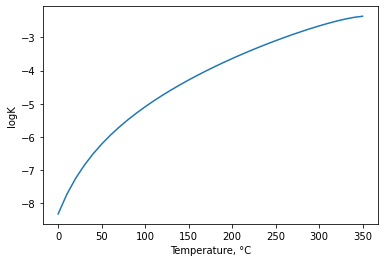

done!


In [18]:
fig = plt.figure()
ax = plt.axes()
x = my_results["out"]["T"]
y = my_results["out"]["logK"]
plt.xlabel("Temperature, °C")
plt.ylabel("logK")
ax.plot(x, y)
plt.show()
print("done!")